# Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

# Dataset Loading

In [23]:
data = load_iris()
features = data['data']
target = data['target']

In [33]:
features = pd.DataFrame(features,columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
target = pd.DataFrame(target)
target_labels = ['setosa','versicolour','virginica']

# Exploratory Data Analysis

Text(0.5, 1.0, 'Types of Iris flowers')

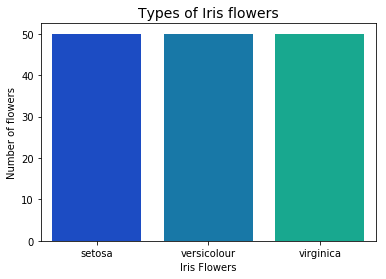

In [42]:
_ = sns.countplot(target.iloc[:,0],palette = 'winter')
_ = plt.xlabel('Iris Flowers')
_ = plt.ylabel('Number of flowers')
plt.xticks(ticks = [0,1,2],labels = target_labels)
plt.title('Types of Iris flowers',fontsize = 14)

In [44]:
feature_labels = list(features.columns)

In [133]:
def draw_histogram(arr,label,ax):
    _ = ax.hist(arr,bins = int(np.sqrt(len(arr))),rwidth = 0.5)
    _ = ax.set_xlabel('{}'.format(label))
    _ = ax.set_ylabel('Count')
    _ = ax.set_title('Distribution of {}'.format(label))

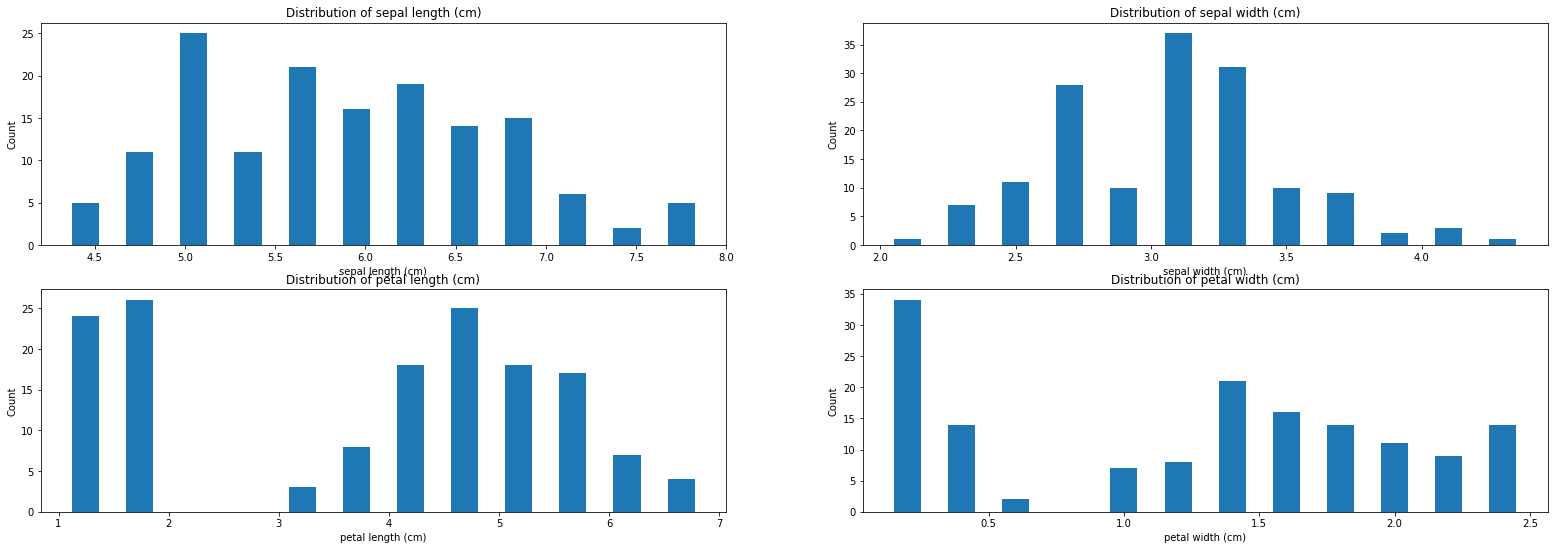

In [140]:
ax = []*4
f,ax = plt.subplots(2,2,figsize = (27,9))
axes = ax.ravel()
i = 0
for col in feature_labels:
    draw_histogram(features[col],col,ax = axes[i])
    i+=1

In [195]:
def ecdf_now(data):
    data = np.array(data)
    s_u_data = np.unique(np.sort(data))
    x_values = np.linspace(start = min(s_u_data),stop = max(s_u_data),num = len(s_u_data))
    y_values = []
    for val in x_values:
        temp = data[data < val]
        y_values.append(temp.size/len(data))
    return x_values,y_values

In [209]:
petal_lengths = features.iloc[:,2]
setosa_petal_lengths = petal_lengths[data['target'] == 0]
versicolor_petal_lengths = petal_lengths[data['target'] == 1]
virginica_petal_lengths = petal_lengths[data['target'] == 2]

In [210]:
x_set,y_set = ecdf_now(setosa_petal_lengths)
x_vers,y_vers = ecdf_now(versicolor_petal_lengths)
x_virg,y_virg = ecdf_now(virginica_petal_lengths)

Text(0, 0.5, 'ECDF')

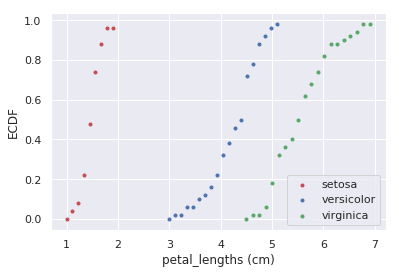

In [213]:
sns.set()
plt.scatter(x_set,y_set,color = 'r',marker = '.',label = 'setosa')
plt.scatter(x_vers,y_vers,color = 'b',marker = '.',label = 'versicolor')
plt.scatter(x_virg,y_virg,color = 'g',marker = '.',label = 'virginica')
plt.xlabel('petal_lengths (cm)')
plt.legend()
plt.ylabel('ECDF')

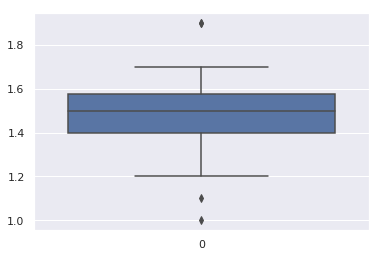

In [378]:
_ = sns.boxplot(x = data['target'][data['target'] == 0],y = setosa_petal_lengths)

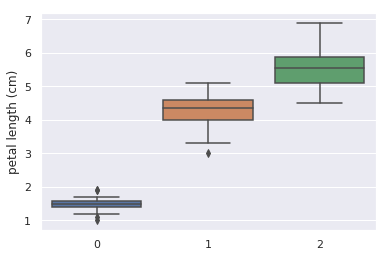

In [379]:
_ = sns.boxplot(x = data['target'],y = petal_lengths)

In [249]:
# an example to denote outliers beyond the 2*IQR linit of a data series

box_bound = np.percentile(setosa_petal_lengths,[25,75])
iqr = box_bound[1] - box_bound[0]
median = np.percentile(setosa_petal_lengths,[50])
setosa_petal_lengths = np.array(setosa_petal_lengths)
outliers = np.vstack([np.array(
    setosa_petal_lengths[setosa_petal_lengths < median - 2*iqr]),
                      setosa_petal_lengths[setosa_petal_lengths > (median + 2*iqr)]]).ravel()

# Model

In [309]:
X = features.values
Y = data['target']
#Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size = 0.2)

In [310]:
from keras import Sequential
from keras.layers import Dense

In [311]:
#Encoding the Y_train and Y_test to binary encoded values
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
Y_train = oe.fit_transform(Y_train.reshape(-1,1)).toarray()
oe1 = OneHotEncoder()
Y_test = oe1.fit_transform(Y_test.reshape(-1,1)).toarray()

/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

In [312]:
model = Sequential()
model.add(Dense(8,input_dim = 4,init = 'uniform',activation = 'relu'))
model.add(Dense(3,init = 'uniform',activation = 'sigmoid'))
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer='adam')
model.summary()
history=model.fit(X_train,Y_train, epochs=100, batch_size=10)

/home/karthi_krish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  
/home/karthi_krish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 0.6922 - acc: 0.5139
Epoch 2/100
120/120 [==============================] - 0s 230us/step - loss: 0.6886 - acc: 0.6667
Epoch 3/100
120/120 [==============================] - 0s 201us/step - loss: 0.6846 - acc: 0.6667
Epoch 4/100
120/120 [==============================] - 0s 241us/step - loss: 0.6797 - acc: 0.6667
Epoch 5/100
120/120 [==============================] - 0s 188us/step - loss: 0.6736 - acc: 0.6667
Epoch 6/100
120/120 [==============================] -

120/120 [==============================] - 0s 194us/step - loss: 0.2773 - acc: 0.8833
Epoch 78/100
120/120 [==============================] - 0s 214us/step - loss: 0.2759 - acc: 0.8833
Epoch 79/100
120/120 [==============================] - 0s 194us/step - loss: 0.2752 - acc: 0.8806
Epoch 80/100
120/120 [==============================] - 0s 176us/step - loss: 0.2734 - acc: 0.8833
Epoch 81/100
120/120 [==============================] - 0s 200us/step - loss: 0.2724 - acc: 0.8833
Epoch 82/100
120/120 [==============================] - 0s 332us/step - loss: 0.2714 - acc: 0.8806
Epoch 83/100
120/120 [==============================] - 0s 174us/step - loss: 0.2700 - acc: 0.8806
Epoch 84/100
120/120 [==============================] - 0s 216us/step - loss: 0.2685 - acc: 0.8833
Epoch 85/100
120/120 [==============================] - 0s 192us/step - loss: 0.2671 - acc: 0.8833
Epoch 86/100
120/120 [==============================] - 0s 227us/step - loss: 0.2653 - acc: 0.8833
Epoch 87/100
120/120 [=

In [314]:
model.evaluate(X_test,Y_test)

30/30 [==============================] - 0s 61us/step


[0.25590306520462036, 0.8555555939674377]

Text(0.5, 1.0, 'Loss Function for MLP ')

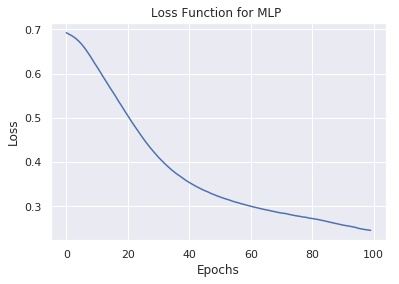

In [332]:
sns.set()
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function for MLP ')

Text(0.5, 1.0, 'Loss Function for MLP ')

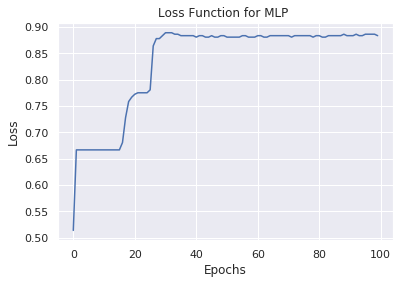

In [337]:
sns.set()
plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function for MLP ')

### Evaluating the model performance using Confusion matrix

In [388]:
y_pred = model.predict_classes(X_test)

In [389]:
cm(oe1.inverse_transform(Y_test),y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

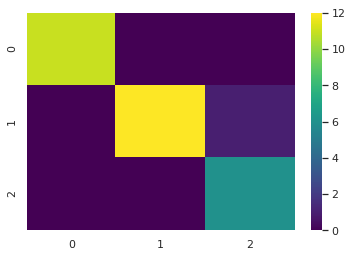

In [397]:
_ = sns.heatmap(pd.DataFrame(cm(oe1.inverse_transform(Y_test),y_pred)),cmap = 'viridis',vmin = 0,vmax = 12)

In [340]:
#import different classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [360]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import cross_val_score


In [364]:
import warnings
warnings.filterwarnings('ignore')
for name,classifier in classifiers.items():
    classifier.fit(X_train,Y_train)
    training_score = cross_val_score(classifier,X_train,Y_train,cv = 5)
    print("Classifier {}  has Training Score of {}".format(classifier.__class__.__name__,round(training_score.mean(),2)))
    

Classifier LogisticRegression  has Training Score of 0.93
Classifier KNeighborsClassifier  has Training Score of 0.93
Classifier SVC  has Training Score of 0.96
Classifier DecisionTreeClassifier  has Training Score of 0.93


In [375]:
for name,classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    print("Classifier {} has an accuracy of {} \nconfusion matrix is \n {} "
          .format(classifier.__class__.__name__,round(accuracy_score(oe1.inverse_transform(Y_test),y_pred),4)*100,confusion_matrix(oe1.inverse_transform(Y_test),y_pred)))

Classifier LogisticRegression has an accuracy of 96.67 
confusion matrix is 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]] 
Classifier KNeighborsClassifier has an accuracy of 96.67 
confusion matrix is 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]] 
Classifier SVC has an accuracy of 100.0 
confusion matrix is 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]] 
Classifier DecisionTreeClassifier has an accuracy of 100.0 
confusion matrix is 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]] 
